In [1]:
# Basic checks

In [2]:
# importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("bank-additional-full.csv",delimiter=";")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# EDA

In [9]:
# Distribution of target variable
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

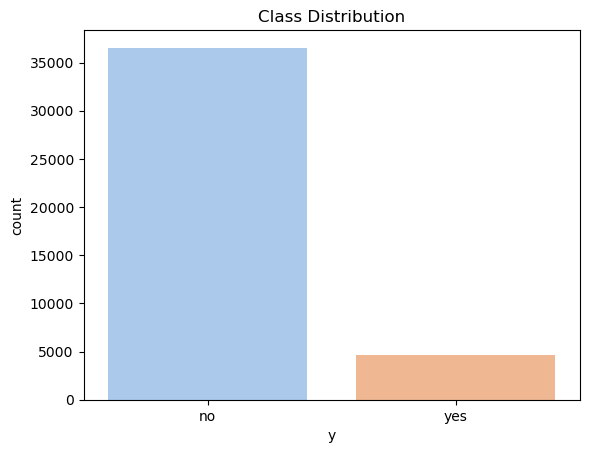

In [10]:
#Visualize class distribution
sns.countplot(x='y', data=df, palette='pastel')
plt.title('Class Distribution')
plt.show()

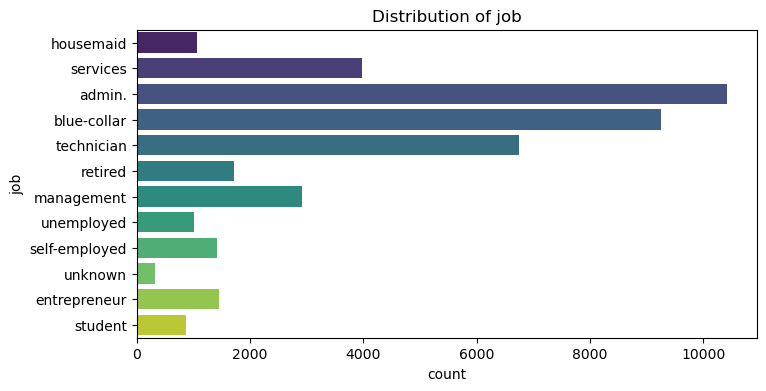

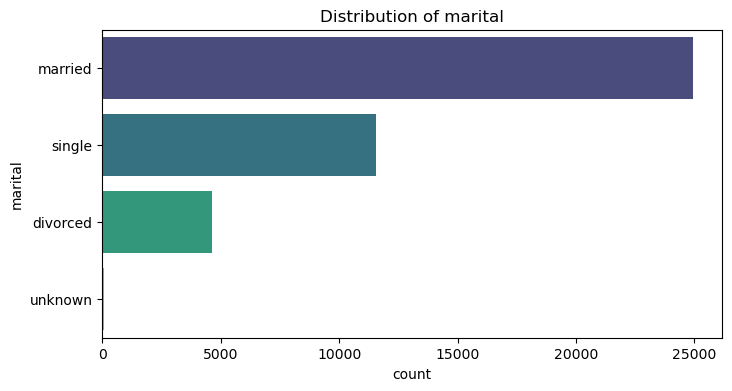

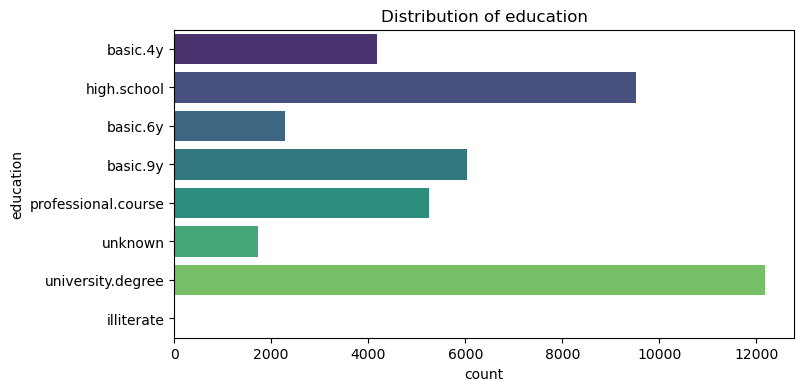

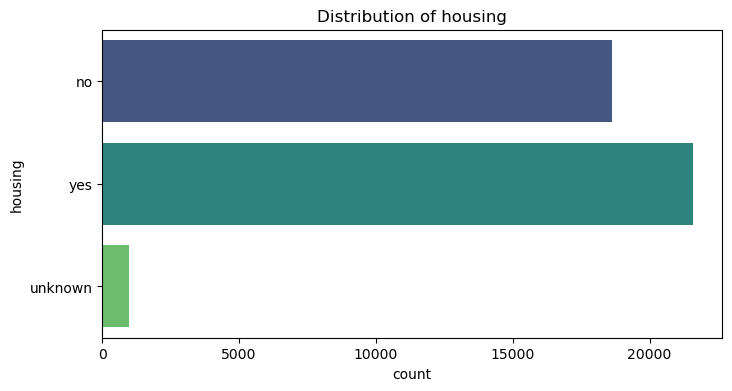

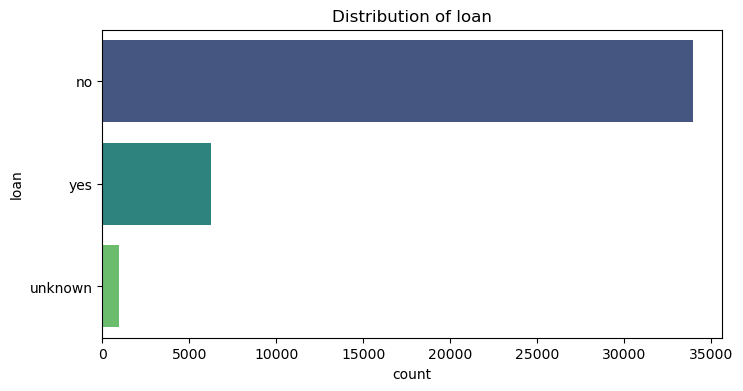

In [11]:
# Plot counts for categorical variables
categorical_cols = ['job', 'marital', 'education', 'housing', 'loan']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=col, data=df, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.show()

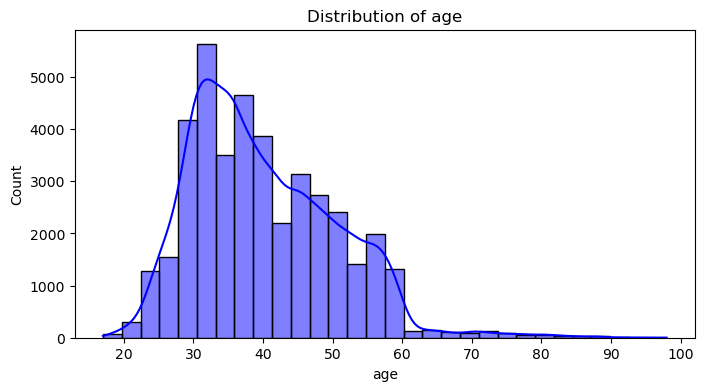

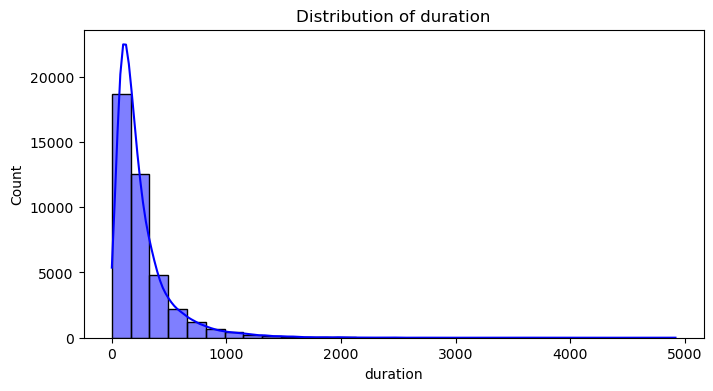

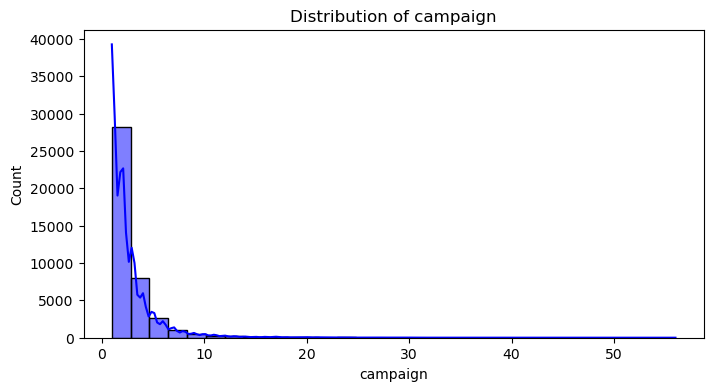

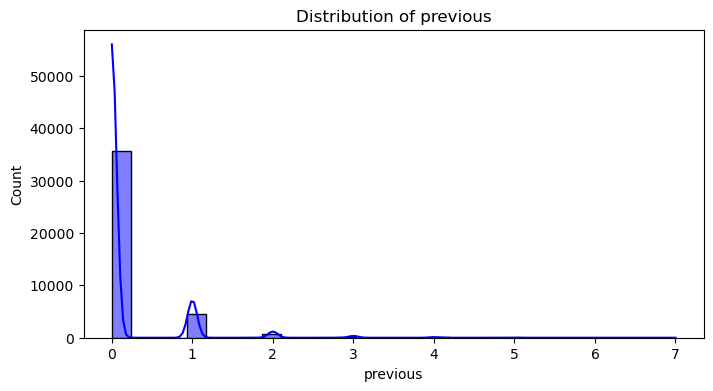

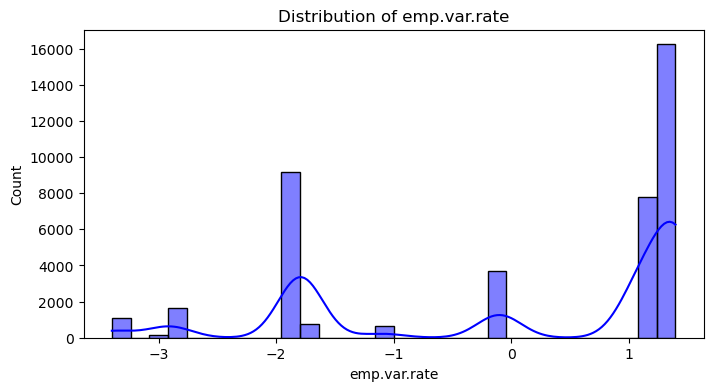

In [12]:
# Distribution plots for numerical variables
numerical_cols = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

In [13]:
# Checking Corelation

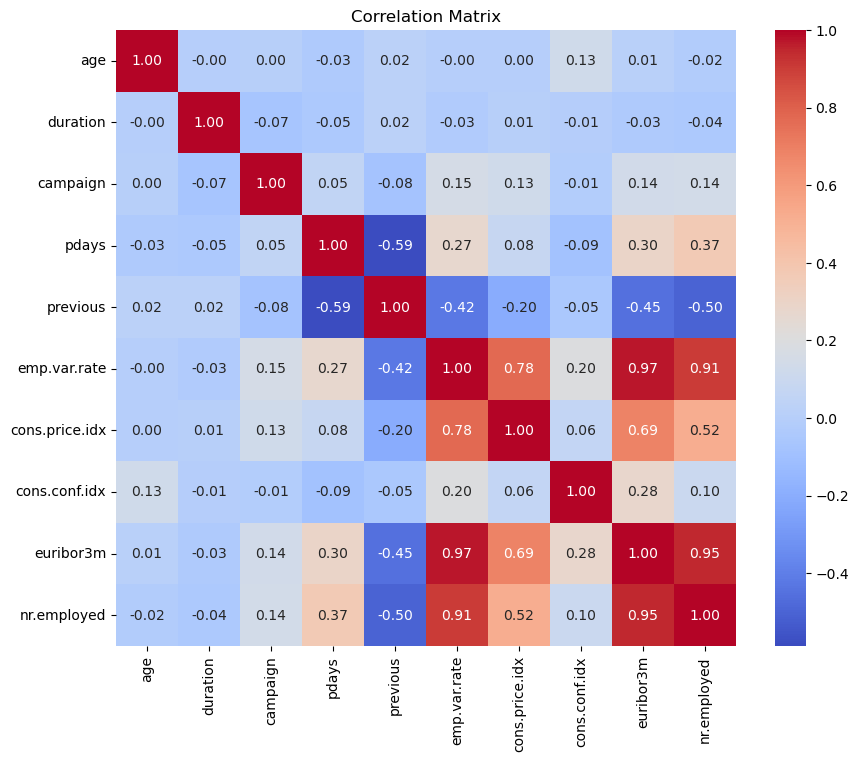

In [14]:
# Select numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

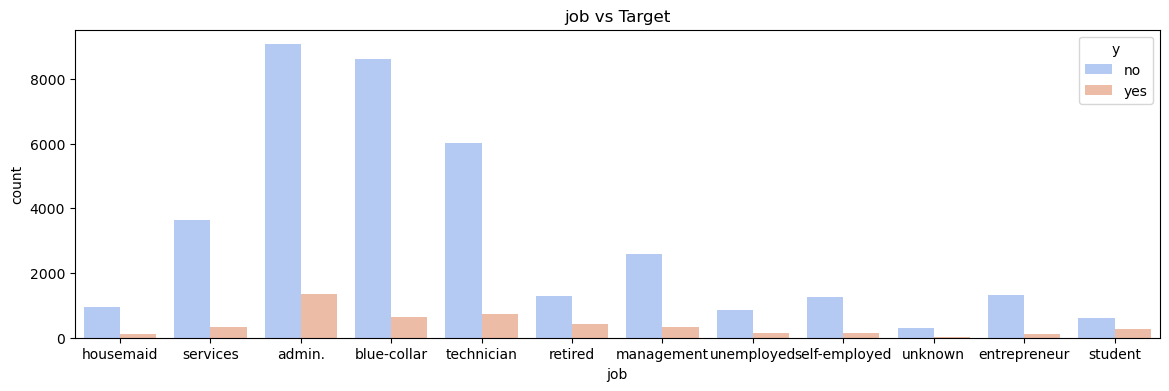

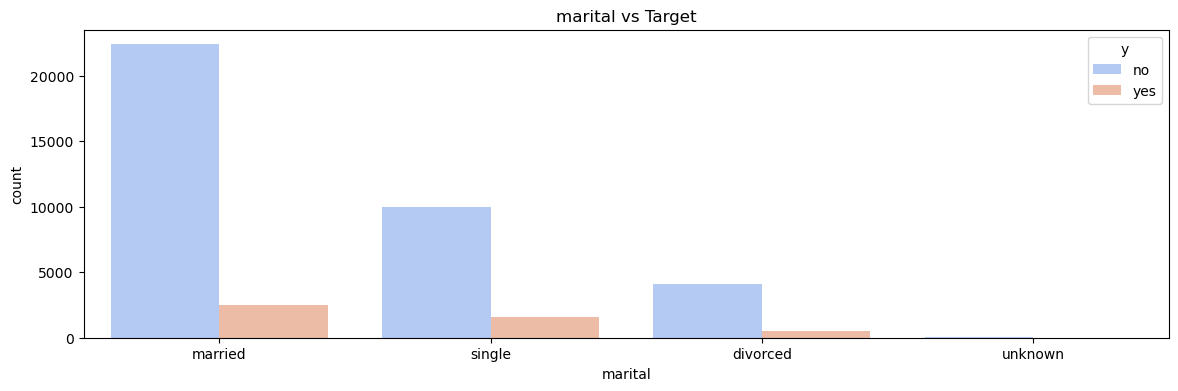

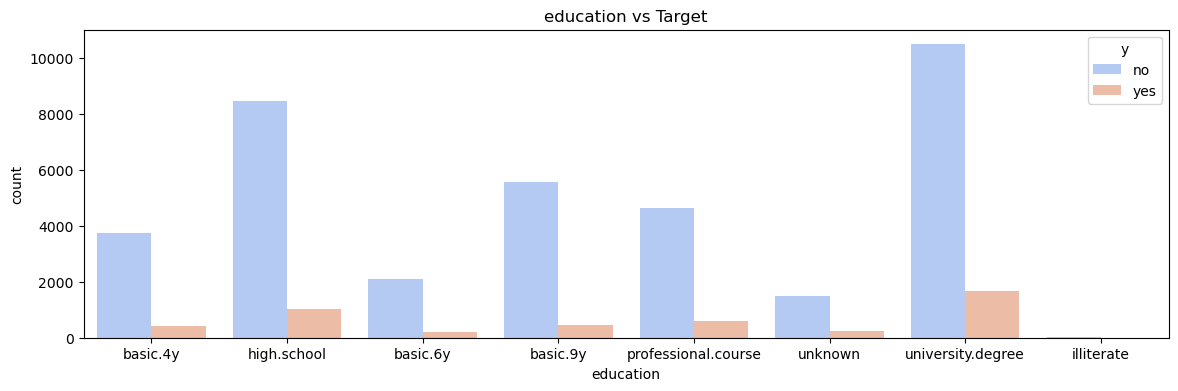

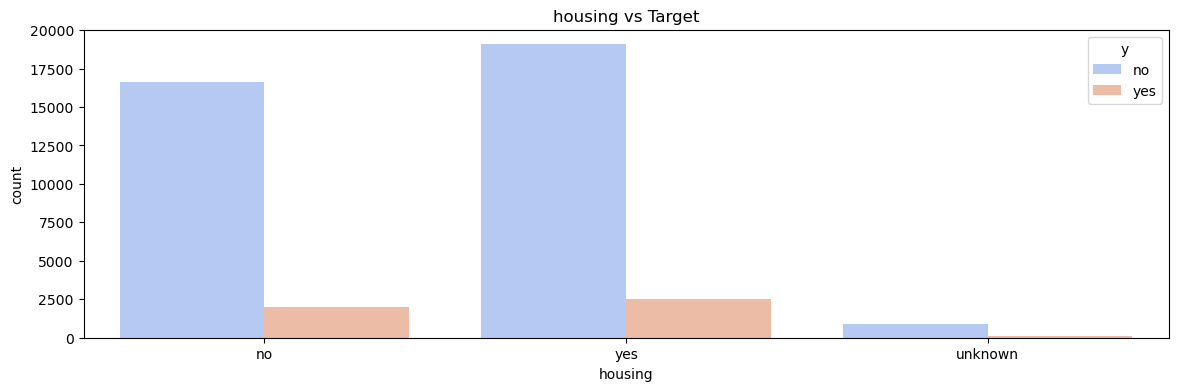

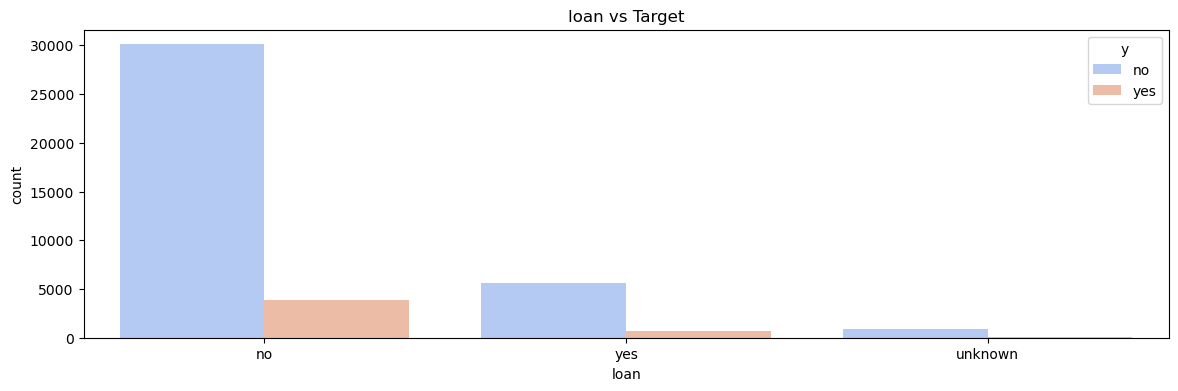

In [15]:
# Categoricaal variables vs target
for col in categorical_cols:
    plt.figure(figsize=(14, 4))
    sns.countplot(x=col, hue='y', data=df, palette='coolwarm')
    plt.title(f'{col} vs Target')
    plt.show()

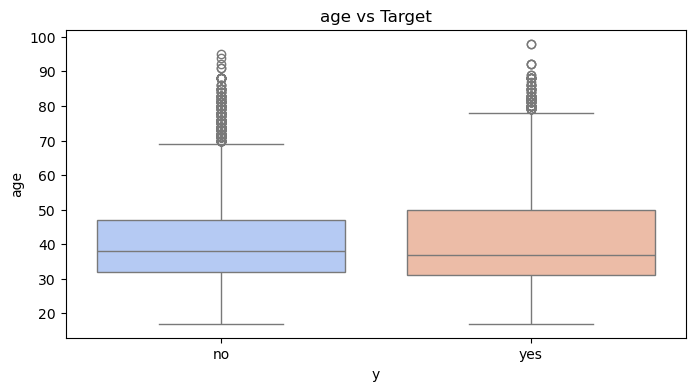

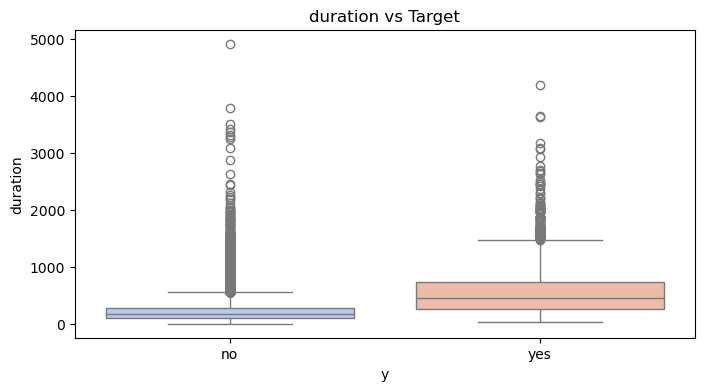

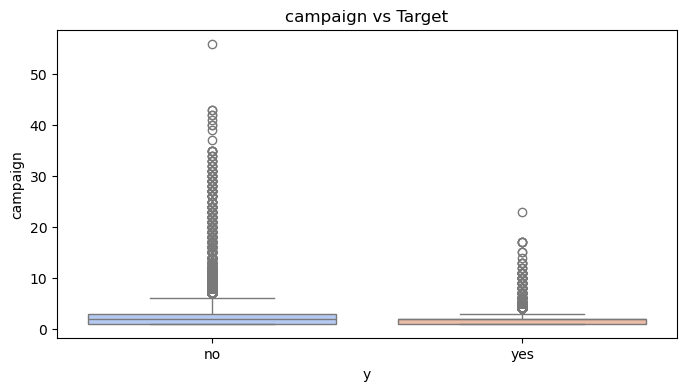

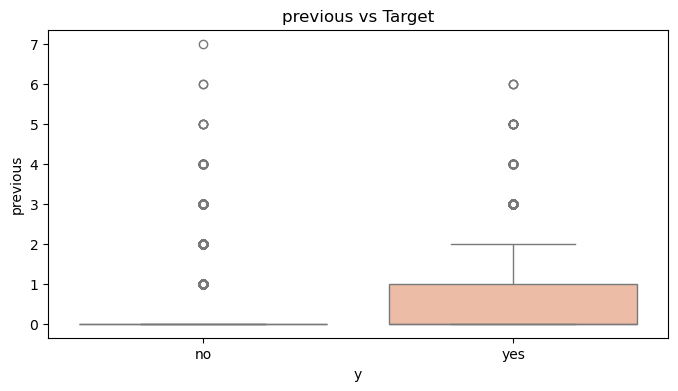

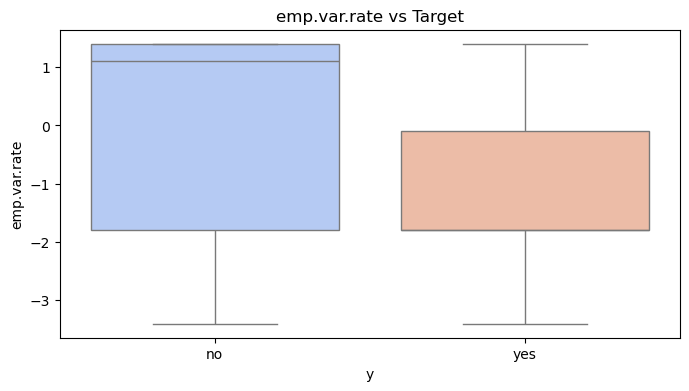

In [16]:
#Numerical Variables vs target vaiables
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='y', y=col, data=df, palette='coolwarm')
    plt.title(f'{col} vs Target')
    plt.show()

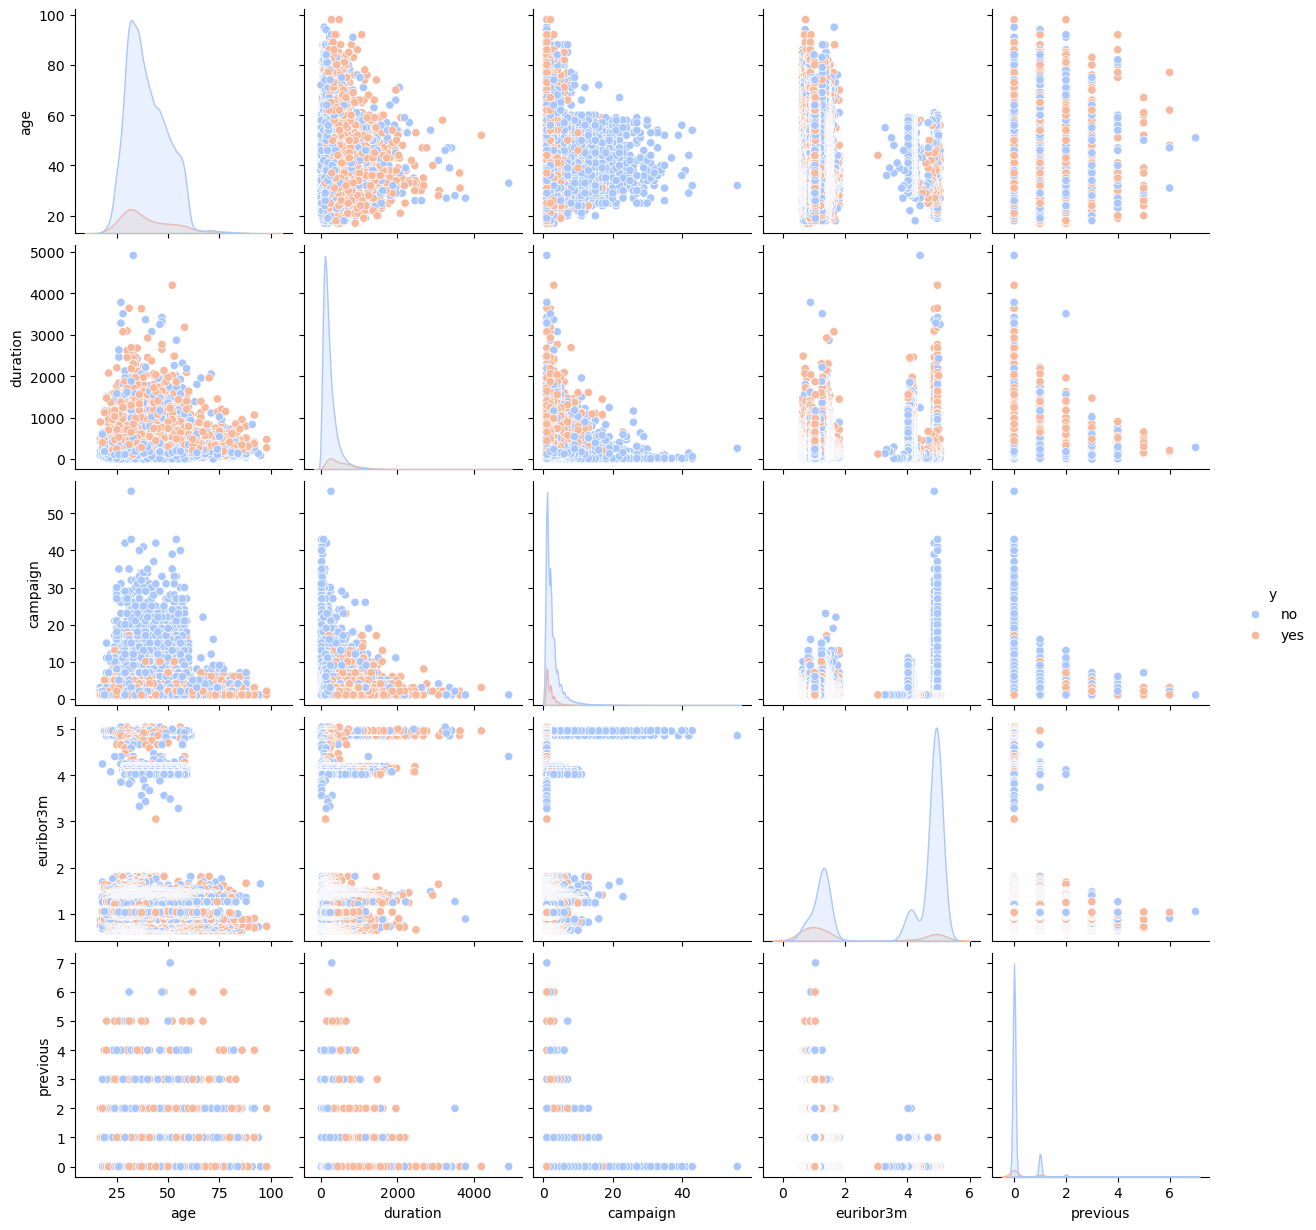

In [17]:
# Pairplot with selected numerical features
selected_features = ['age', 'duration', 'campaign', 'euribor3m', 'previous', 'y']
sns.pairplot(df[selected_features], hue='y', palette='coolwarm')
plt.show()

# Data PreProcessing

### Checking Missing values

In [18]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [19]:
# Here we can see that there is no any null values so we do not need to handle the missing values

In [20]:
df.drop(['duration','emp.var.rate','nr.employed','euribor3m','day_of_week','month'],axis=1, inplace=True)

In [21]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'campaign', 'pdays', 'previous', 'poutcome',
       'cons.price.idx', 'cons.conf.idx', 'y'],
      dtype='object')

### Outliers

In [22]:
# Numerical Variables
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

print("number of numerical variables:",len(numerical_features))

df[numerical_features].head()

number of numerical variables: 6


,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx
0,56,1,999,0,93.994,-36.4
1,57,1,999,0,93.994,-36.4
2,37,1,999,0,93.994,-36.4
3,40,1,999,0,93.994,-36.4
4,56,1,999,0,93.994,-36.4


In [23]:
df[numerical_features].columns

Index(['age', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx'],
      dtype='object')

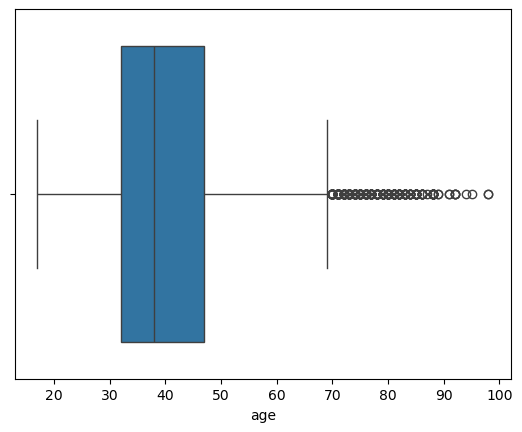

In [24]:
# Age
sns.boxplot(x = df.age)
plt.show()

In [25]:
from scipy.stats.mstats import winsorize
trim_percentage = 0.05
df['age'] = winsorize(df['age'], limits=trim_percentage)

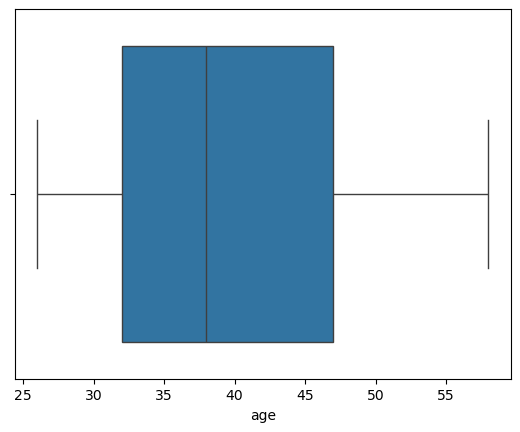

In [26]:
sns.boxplot(x = df.age)
plt.show()

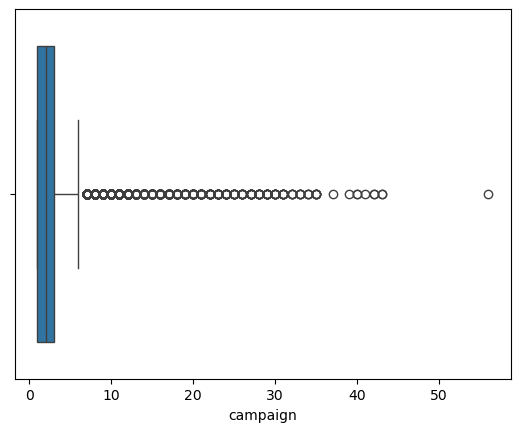

In [27]:
# campaign
sns.boxplot(x = df.campaign)
plt.show()

In [28]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")


Lower bound: -2.0, Upper bound: 6.0


In [29]:
# Remove outliers
df = df[(df['campaign'] >= lower_bound) & (df['campaign'] <= upper_bound)]

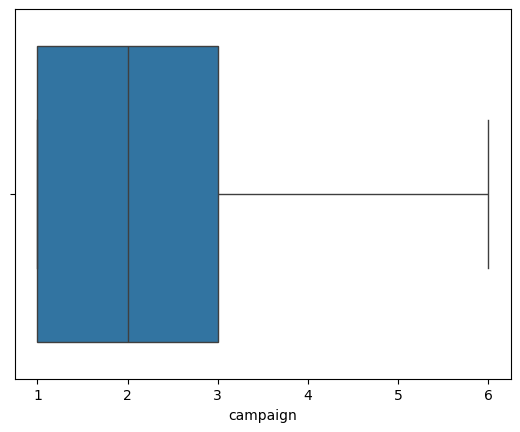

In [30]:
sns.boxplot(x=df['campaign'])
plt.show()

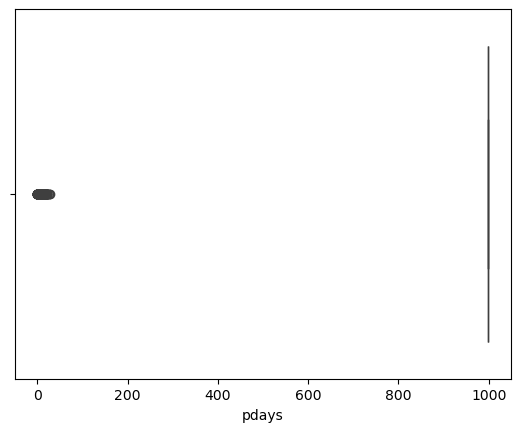

In [31]:
#pdays
sns.boxplot(x = df.pdays)
plt.show()

In [32]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['pdays'].quantile(0.25)
Q3 = df['pdays'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Lower Bound: 999.0, Upper Bound: 999.0


In [33]:
# Filter the DataFrame to remove outliers
df = df[(df['pdays'] >= lower_bound) & (df['pdays'] <= upper_bound)]

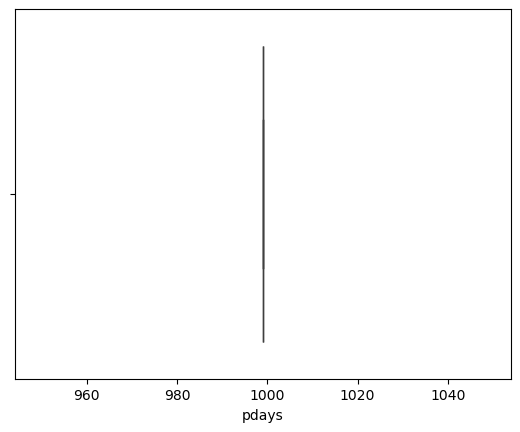

In [34]:
sns.boxplot(x=df['pdays'])
plt.show()


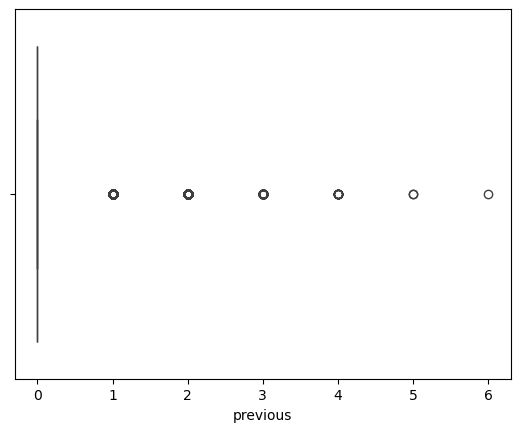

In [35]:
#previous
sns.boxplot(x = df.previous)
plt.show()

In [36]:
import pandas as pd

# Calculate IQR
Q1 = df['previous'].quantile(0.25)
Q3 = df['previous'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['previous'] >= lower_bound) & (df['previous'] <= upper_bound)]

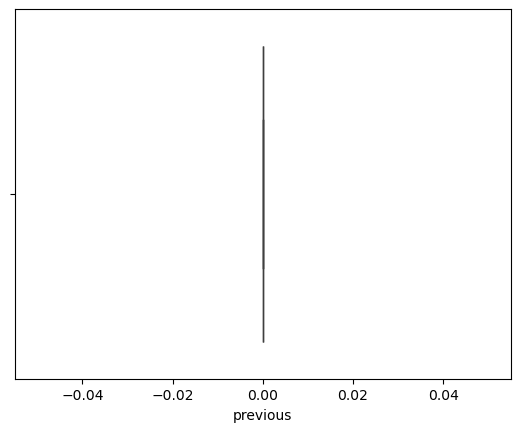

In [37]:
sns.boxplot(x = df.previous)
plt.show()

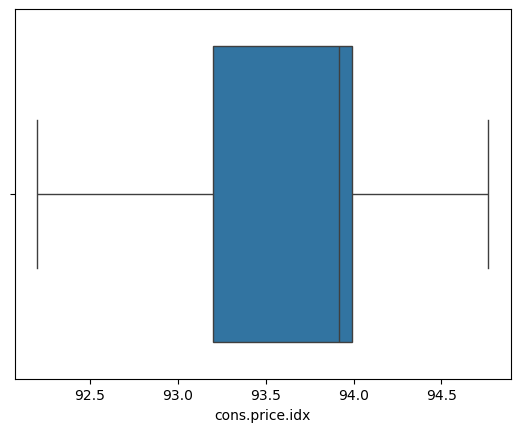

In [38]:
#cons.price.idx
sns.boxplot(x = df['cons.price.idx'])
plt.show()

In [39]:
# In cons.price.idx , there is no any outlier

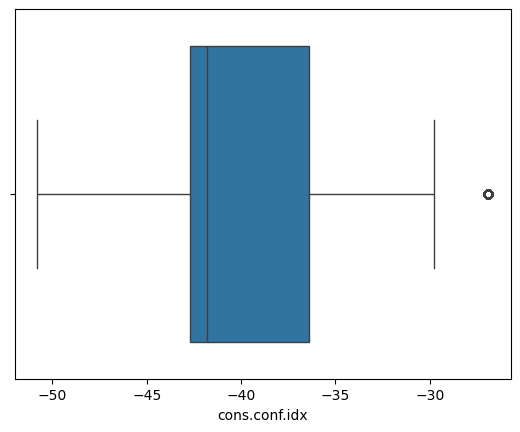

In [40]:
#cons.conf.idx
sns.boxplot(x = df['cons.conf.idx'])
plt.show()

In [41]:
from scipy.stats.mstats import winsorize
trim_percentage = 0.05
df['cons.conf.idx'] = winsorize(df['cons.conf.idx'], limits=trim_percentage)

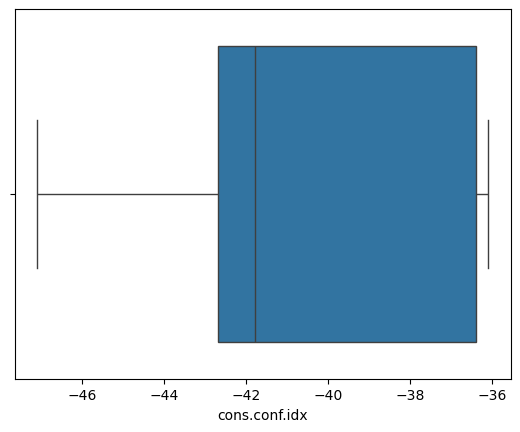

In [42]:
sns.boxplot(x = df['cons.conf.idx'])
plt.show()

### Encoding

In [43]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("number of categorical variables:",len(categorical_features))

df[categorical_features].head()

number of categorical variables: 9


,job,marital,education,default,housing,loan,contact,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,nonexistent,no


In [44]:
df[categorical_features].columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y'],
      dtype='object')

In [45]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])

print(df.head())

   age  job  marital  education  default  housing  loan  contact  campaign  \
0   56    3        1          0        0        0     0        1         1   
1   57    7        1          3        1        0     0        1         1   
2   37    7        1          3        0        2     0        1         1   
3   40    0        1          1        0        0     0        1         1   
4   56    7        1          3        0        0     2        1         1   

   pdays  previous  poutcome  cons.price.idx  cons.conf.idx  y  
0    999         0         0          93.994          -36.4  0  
1    999         0         0          93.994          -36.4  0  
2    999         0         0          93.994          -36.4  0  
3    999         0         0          93.994          -36.4  0  
4    999         0         0          93.994          -36.4  0  


In [46]:
df.head()

,age,job,marital,education,default,housing,loan,contact,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
0,56,3,1,0,0,0,0,1,1,999,0,0,93.994,-36.4,0
1,57,7,1,3,1,0,0,1,1,999,0,0,93.994,-36.4,0
2,37,7,1,3,0,2,0,1,1,999,0,0,93.994,-36.4,0
3,40,0,1,1,0,0,0,1,1,999,0,0,93.994,-36.4,0
4,56,7,1,3,0,0,2,1,1,999,0,0,93.994,-36.4,0


In [47]:
# Define features and target variable
X = df.drop(['y'], axis=1)
y = df['y']  # Target variable (encoded)

# Check dimensions
print(X.shape, y.shape)

(33262, 14) (33262,)


### Train - test split

In [48]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(26609, 14) (6653, 14) (26609,) (6653,)


### Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building

In [50]:
# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[6026    0]
 [ 627    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6026
           1       0.00      0.00      0.00       627

    accuracy                           0.91      6653
   macro avg       0.45      0.50      0.48      6653
weighted avg       0.82      0.91      0.86      6653

Accuracy: 0.91


In [53]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

# Classification report
print("Classification Report:")
print(classification_report(y_test, rf_pred))
# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Confusion Matrix:
[[5878  148]
 [ 543   84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      6026
           1       0.36      0.13      0.20       627

    accuracy                           0.90      6653
   macro avg       0.64      0.55      0.57      6653
weighted avg       0.86      0.90      0.87      6653

Random Forest Accuracy: 0.8961370810160829


In [54]:
#SVM
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, svc_pred))
# Classification report                       
print("Classification Report:")
print(classification_report(y_test, svc_pred))
# Accuracy
print("SVM Accuracy:", accuracy_score(y_test, svc_pred))

Confusion Matrix:
[[6026    0]
 [ 627    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6026
           1       0.00      0.00      0.00       627

    accuracy                           0.91      6653
   macro avg       0.45      0.50      0.48      6653
weighted avg       0.82      0.91      0.86      6653

SVM Accuracy: 0.9057568014429581


In [55]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_pred))
# Classification report                       
print("Classification Report:")
print(classification_report(y_test, dt_pred))
#Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Confusion Matrix:
[[5568  458]
 [ 491  136]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6026
           1       0.23      0.22      0.22       627

    accuracy                           0.86      6653
   macro avg       0.57      0.57      0.57      6653
weighted avg       0.85      0.86      0.86      6653

Decision Tree Accuracy: 0.8573575830452428
